In [1]:
import pandas as pd
import numpy as np

In [2]:
bigsol_smiles = pd.read_csv("../data/krasnov/bigsoldb_chemprop_nonaq.csv")["solute_smiles"].unique()
solprop_smiles = pd.read_csv("../data/vermeire/solprop_chemprop_nonaq.csv")["solute_smiles"].unique()
leeds_smiles = np.concatenate(
    (pd.read_csv("../data/boobier/leeds_acetone_chemprop.csv")["solute_smiles"].to_numpy(),
    pd.read_csv("../data/boobier/leeds_ethanol_chemprop.csv")["solute_smiles"].to_numpy(),
    pd.read_csv("../data/boobier/leeds_benzene_chemprop.csv")["solute_smiles"].to_numpy(),)
)

In [3]:
combined = np.concatenate((bigsol_smiles, solprop_smiles, leeds_smiles))
targets = ["BigSolDB"] * len(bigsol_smiles) + ["SolProp"] * len(solprop_smiles) + ["Leeds"] * len(leeds_smiles)

In [4]:
import chemplot

/home/jackson/miniconda3/envs/chemplot/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/jackson/miniconda3/envs/chemplot/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jackson/miniconda3/envs/chemplot/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: label='scatter', title={'center': 'UMAP plot'}, xlabel='UMAP-1', ylabel='UMAP-2'>

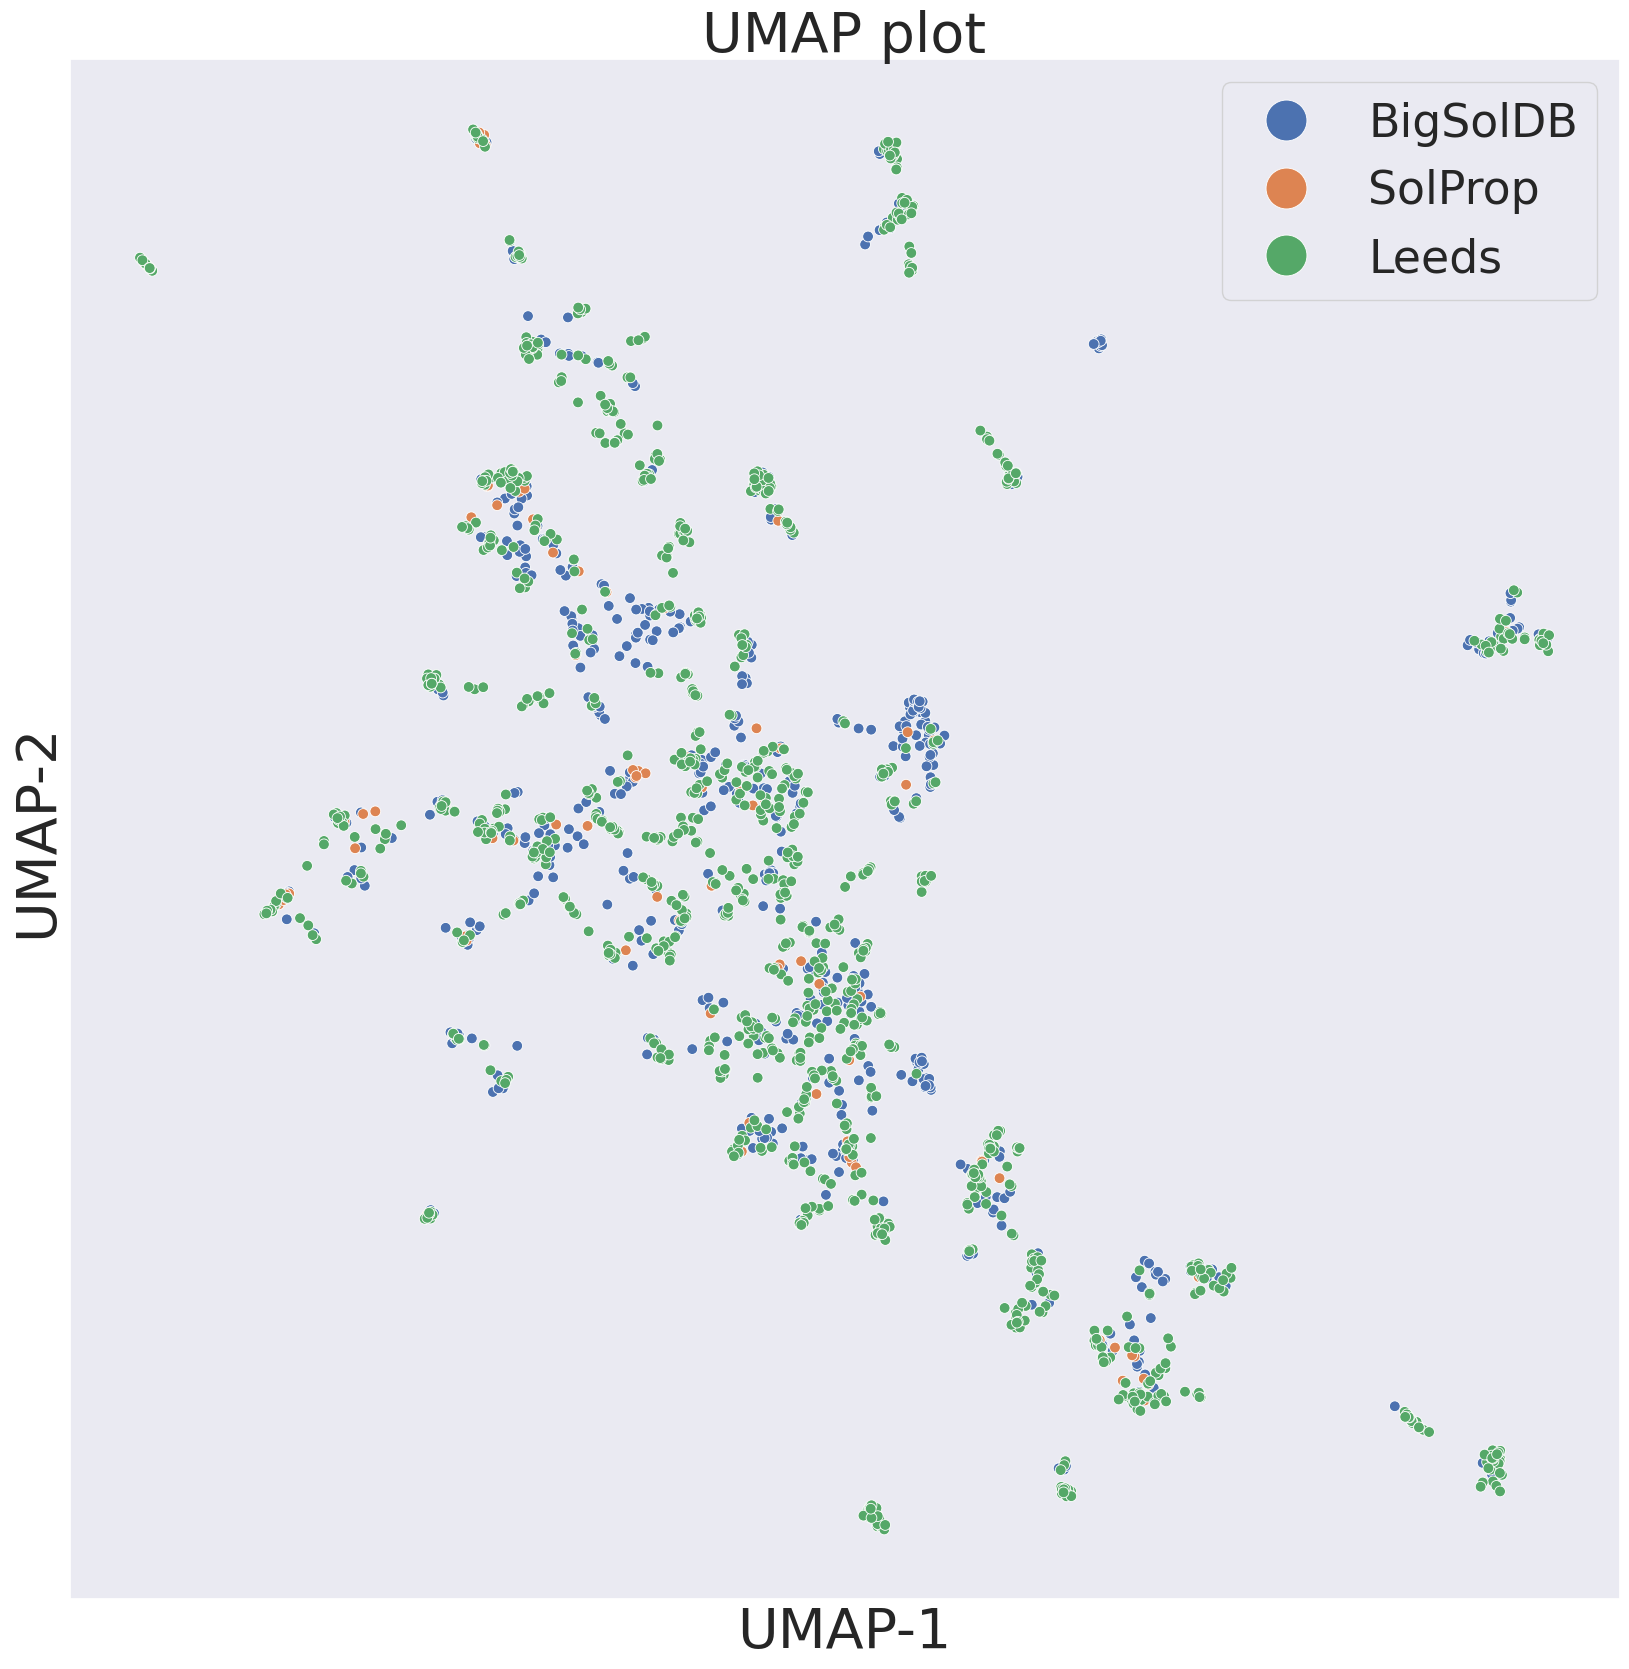

In [9]:
plotter = chemplot.Plotter.from_smiles(combined, target=targets, target_type="C", sim_type="structural")
plotter.umap(random_state=1701)
plotter.visualize_plot()